In [1]:
from qiskit.transpiler import InstructionDurations
from qiskit import IBMQ, transpile, Aer
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default')
backend = provider.get_backend('ibmq_jakarta')

In [2]:
import os
os.getcwd()
os.chdir('/home/siyuan/Seafile/Thesis/PycharmProjects/DD_PE_paper/')

In [3]:
from src.tools.DD_insertion import construct_bv_circuit, \
                                 construct_graph_matrix, \
                                 convert_count_to_prob, \
                                 translate_circuit_to_basis
from qiskit.circuit.library import QFT, GraphState

In [4]:
bv_circuits = []
hs_circuits = []
qft_circuits = []
for i in range(3, 7):
    bv_circuits.append(construct_bv_circuit(i))

# for i in range(2, 15, 2):
#     hs_circuits.append(construct_hs_circuit(i))

for i in range(3, 7):
    qft_circuits.append(QFT(i))

for circuit in bv_circuits:
    circuit.measure_all()

# for circuit in hs_circuits:
#     circuit.measure_all()

for circuit in qft_circuits:
    circuit.measure_all()

In [5]:
durations = InstructionDurations.from_backend(backend)
## add duration of y gates which are used for DD sequences
bconf = backend.configuration()
for i in range(bconf.num_qubits):
    x_duration = durations.get('x', i)
    durations.update(InstructionDurations(
        [('y', i, x_duration)]
        ))

    durations.update(InstructionDurations(
        [('rx', i, x_duration)]
        ))

    durations.update(InstructionDurations(
        [('ry', i, x_duration)]
        ))

In [6]:
graph_state_circuits = []
coupling_map = backend.configuration().coupling_map

for i in range(3, 7):
    gs_circuit_matrix = construct_graph_matrix(i, coupling_map)
    graph_state_circuits.append(GraphState(gs_circuit_matrix))

for circuit in graph_state_circuits:
    circuit.measure_all()

In [7]:
from src.tools.DD_insertion import pm_DD_sequences
pms = pm_DD_sequences(durations)

In [8]:
bv_job_ids = []
bv_jobs = []

for circuit in bv_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    bv_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    bv_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
6295d644bc0d026727dbecf8
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
6295d6469baeab12014acd73
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d648bc0d029cefdbecf9
if applied DD for None: False
if applied DD f

In [9]:
for job_id in bv_job_ids:
    print(job_id)

6295d644bc0d026727dbecf8
6295d6469baeab12014acd73
6295d648bc0d029cefdbecf9
6295d64a0212ff553d251f18


In [9]:
from qiskit import execute

shots = 8192
psts = []
bv_job_ids = [
    '',
    '',
    '',
    '',


]
for i, circuit in enumerate(bv_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    ideal_result = list(ideal_counts.keys())[0]
    result_counts = backend.retrieve_job(bv_job_ids[i]).result().get_counts()
    pst = []
    for result_count in result_counts:
        obtain_results = result_count.get(ideal_result, 0)
        pst.append(obtain_results/shots)
    psts.append(pst)

bv_circuit_names = ['BV3', 'BV4', 'BV5', 'BV6']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']
bv_results_data = {}

for i, name in enumerate(bv_circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, pst in enumerate(psts[i]):
        print(f'pst result of {DD_sequences[j]}: {pst}')
    bv_results_data[name] = psts[i]

---------Result of circuit BV3 -------------
pst result of no_dd: 0.42724609375
pst result of hahn_X: 0.4207763671875
pst result of hahn_Y: 0.419921875
pst result of CP: 0.413330078125
pst result of CPMG: 0.427490234375
pst result of xy4: 0.4229736328125
pst result of xy8: 0.419677734375
pst result of xy16: 0.4290771484375
pst result of udd1: 0.4091796875
pst result of udd2: 0.4234619140625
pst result of kdd: 0.4195556640625
---------Result of circuit BV4 -------------
pst result of no_dd: 0.4544677734375
pst result of hahn_X: 0.4622802734375
pst result of hahn_Y: 0.4603271484375
pst result of CP: 0.45849609375
pst result of CPMG: 0.4561767578125
pst result of xy4: 0.4505615234375
pst result of xy8: 0.4476318359375
pst result of xy16: 0.46337890625
pst result of udd1: 0.446533203125
pst result of udd2: 0.458251953125
pst result of kdd: 0.4498291015625
---------Result of circuit BV5 -------------
pst result of no_dd: 0.360595703125
pst result of hahn_X: 0.349853515625
pst result of hahn

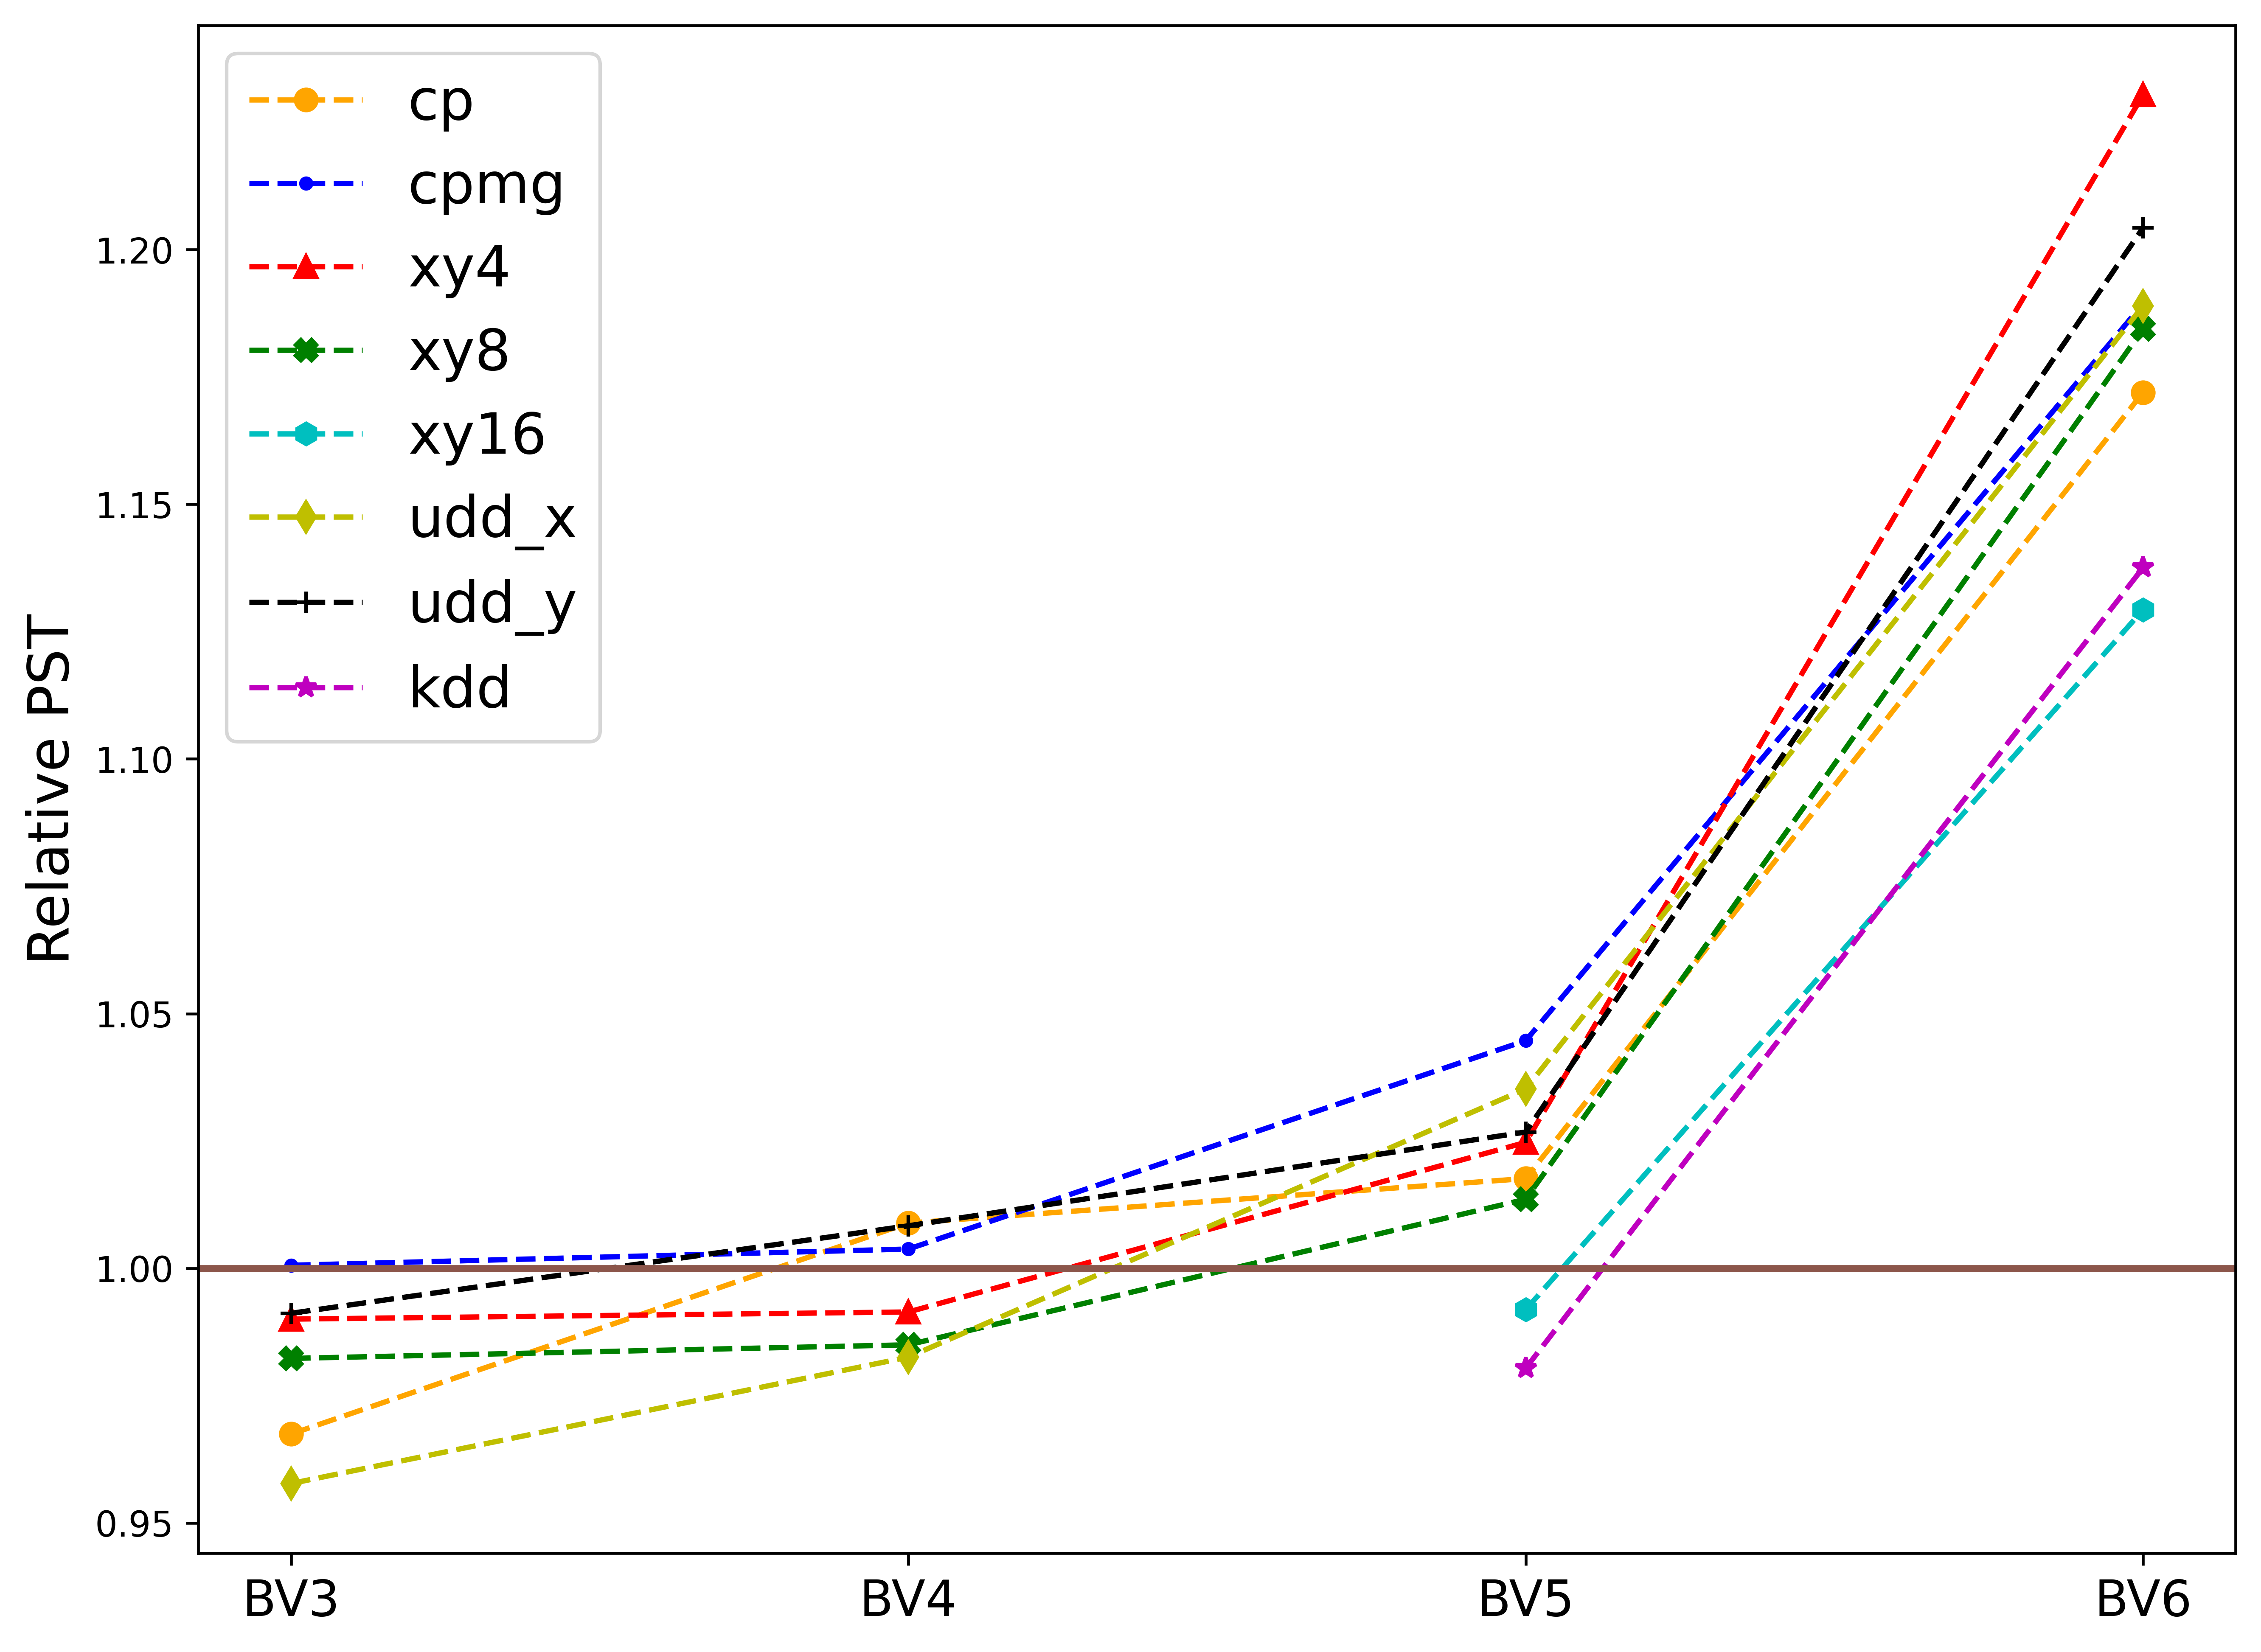

In [10]:
import numpy as np
import matplotlib.pyplot as plt

baseline = []

data = []
for name in bv_circuit_names:
    result_data = bv_results_data[name]
    baseline.append(result_data[0])
    ratio = [i/result_data[0] for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)

# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]

cp = data[:, 2]
cpmg = data[:, 3]
xy4 = data[:, 4]
xy8 = data[:, 5]
xy16 = list(data[2:, 6])
xy16.insert(0, None)
xy16.insert(0, None)
udd_X = data[:, 7]
udd_Y = data[:, 8]
kdd = list(data[2:, 9])
kdd.insert(0, None)
kdd.insert(0, None)


x_ticks = bv_circuit_names[:]
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp, linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg, linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4, linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8, linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16, linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X, linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y, linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd, linestyle='--', marker='*', color='m', label='kdd')
plt.axhline(1, color='tab:brown', lw=2)

plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative PST result for BV circuit on ibmq_jakarta', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative PST', fontsize=16)
plt.savefig('TQE_Relat_PST_BV_jakarta_T_0530.pdf', bbox_inches='tight', pad_inches=0)

In [10]:
gs_job_ids = []
gs_jobs = []

for circuit in graph_state_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    gs_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    gs_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d64b3bb4af8a4cb95509
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d64d4bb9758357efb4ce
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d64e4ad65509779e4aa6
if applied DD for None: False
if applied DD for N

In [11]:
for job_id in gs_job_ids:
    print(job_id)

6295d64b3bb4af8a4cb95509
6295d64d4bb9758357efb4ce
6295d64e4ad65509779e4aa6
6295d650f33cdba1eb2e069f


In [12]:
from scipy.spatial.distance import jensenshannon
from qiskit import execute
gs_jsds = []

gs_job_ids = [
    '',
    '',
    '',
    '',
]


shots = 8192

for i, circuit in enumerate(graph_state_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    result_counts = backend.retrieve_job(gs_job_ids[i]).result().get_counts()
    jsd = []
    for result_count in result_counts:
        p_ideal, p_result = convert_count_to_prob(result_count, ideal_counts, shots=shots)
        jsd.append(jensenshannon(p_ideal, p_result))
    gs_jsds.append(jsd)

circuit_names = ['GS3', 'GS4', 'GS5', 'GS6',]
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']

gs_results_data = {}

for i, name in enumerate(circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, jsd in enumerate(gs_jsds[i]):
        print(f'jsd result of {DD_sequences[j]}: {jsd}')
    gs_results_data[name] = gs_jsds[i]

---------Result of circuit GS3 -------------
jsd result of no_dd: 0.02883295253399296
jsd result of hahn_X: 0.03716790364414586
jsd result of hahn_Y: 0.03054953778894083
jsd result of CP: 0.02371570702797783
jsd result of CPMG: 0.05204789863393799
jsd result of xy4: 0.04856588434755781
jsd result of xy8: 0.03314040876346889
jsd result of xy16: 0.03226323395112177
jsd result of udd1: 0.028522437232509124
jsd result of udd2: 0.05713687486390443
jsd result of kdd: 0.0295461139993964
---------Result of circuit GS4 -------------
jsd result of no_dd: 0.03329104143192513
jsd result of hahn_X: 0.03853695262341777
jsd result of hahn_Y: 0.036112565090472656
jsd result of CP: 0.039047527376968094
jsd result of CPMG: 0.04469927359643938
jsd result of xy4: 0.0514321485618584
jsd result of xy8: 0.047474010265550225
jsd result of xy16: 0.02948293327543501
jsd result of udd1: 0.04296554063549916
jsd result of udd2: 0.05163068846278985
jsd result of kdd: 0.03791159228914659
---------Result of circuit G

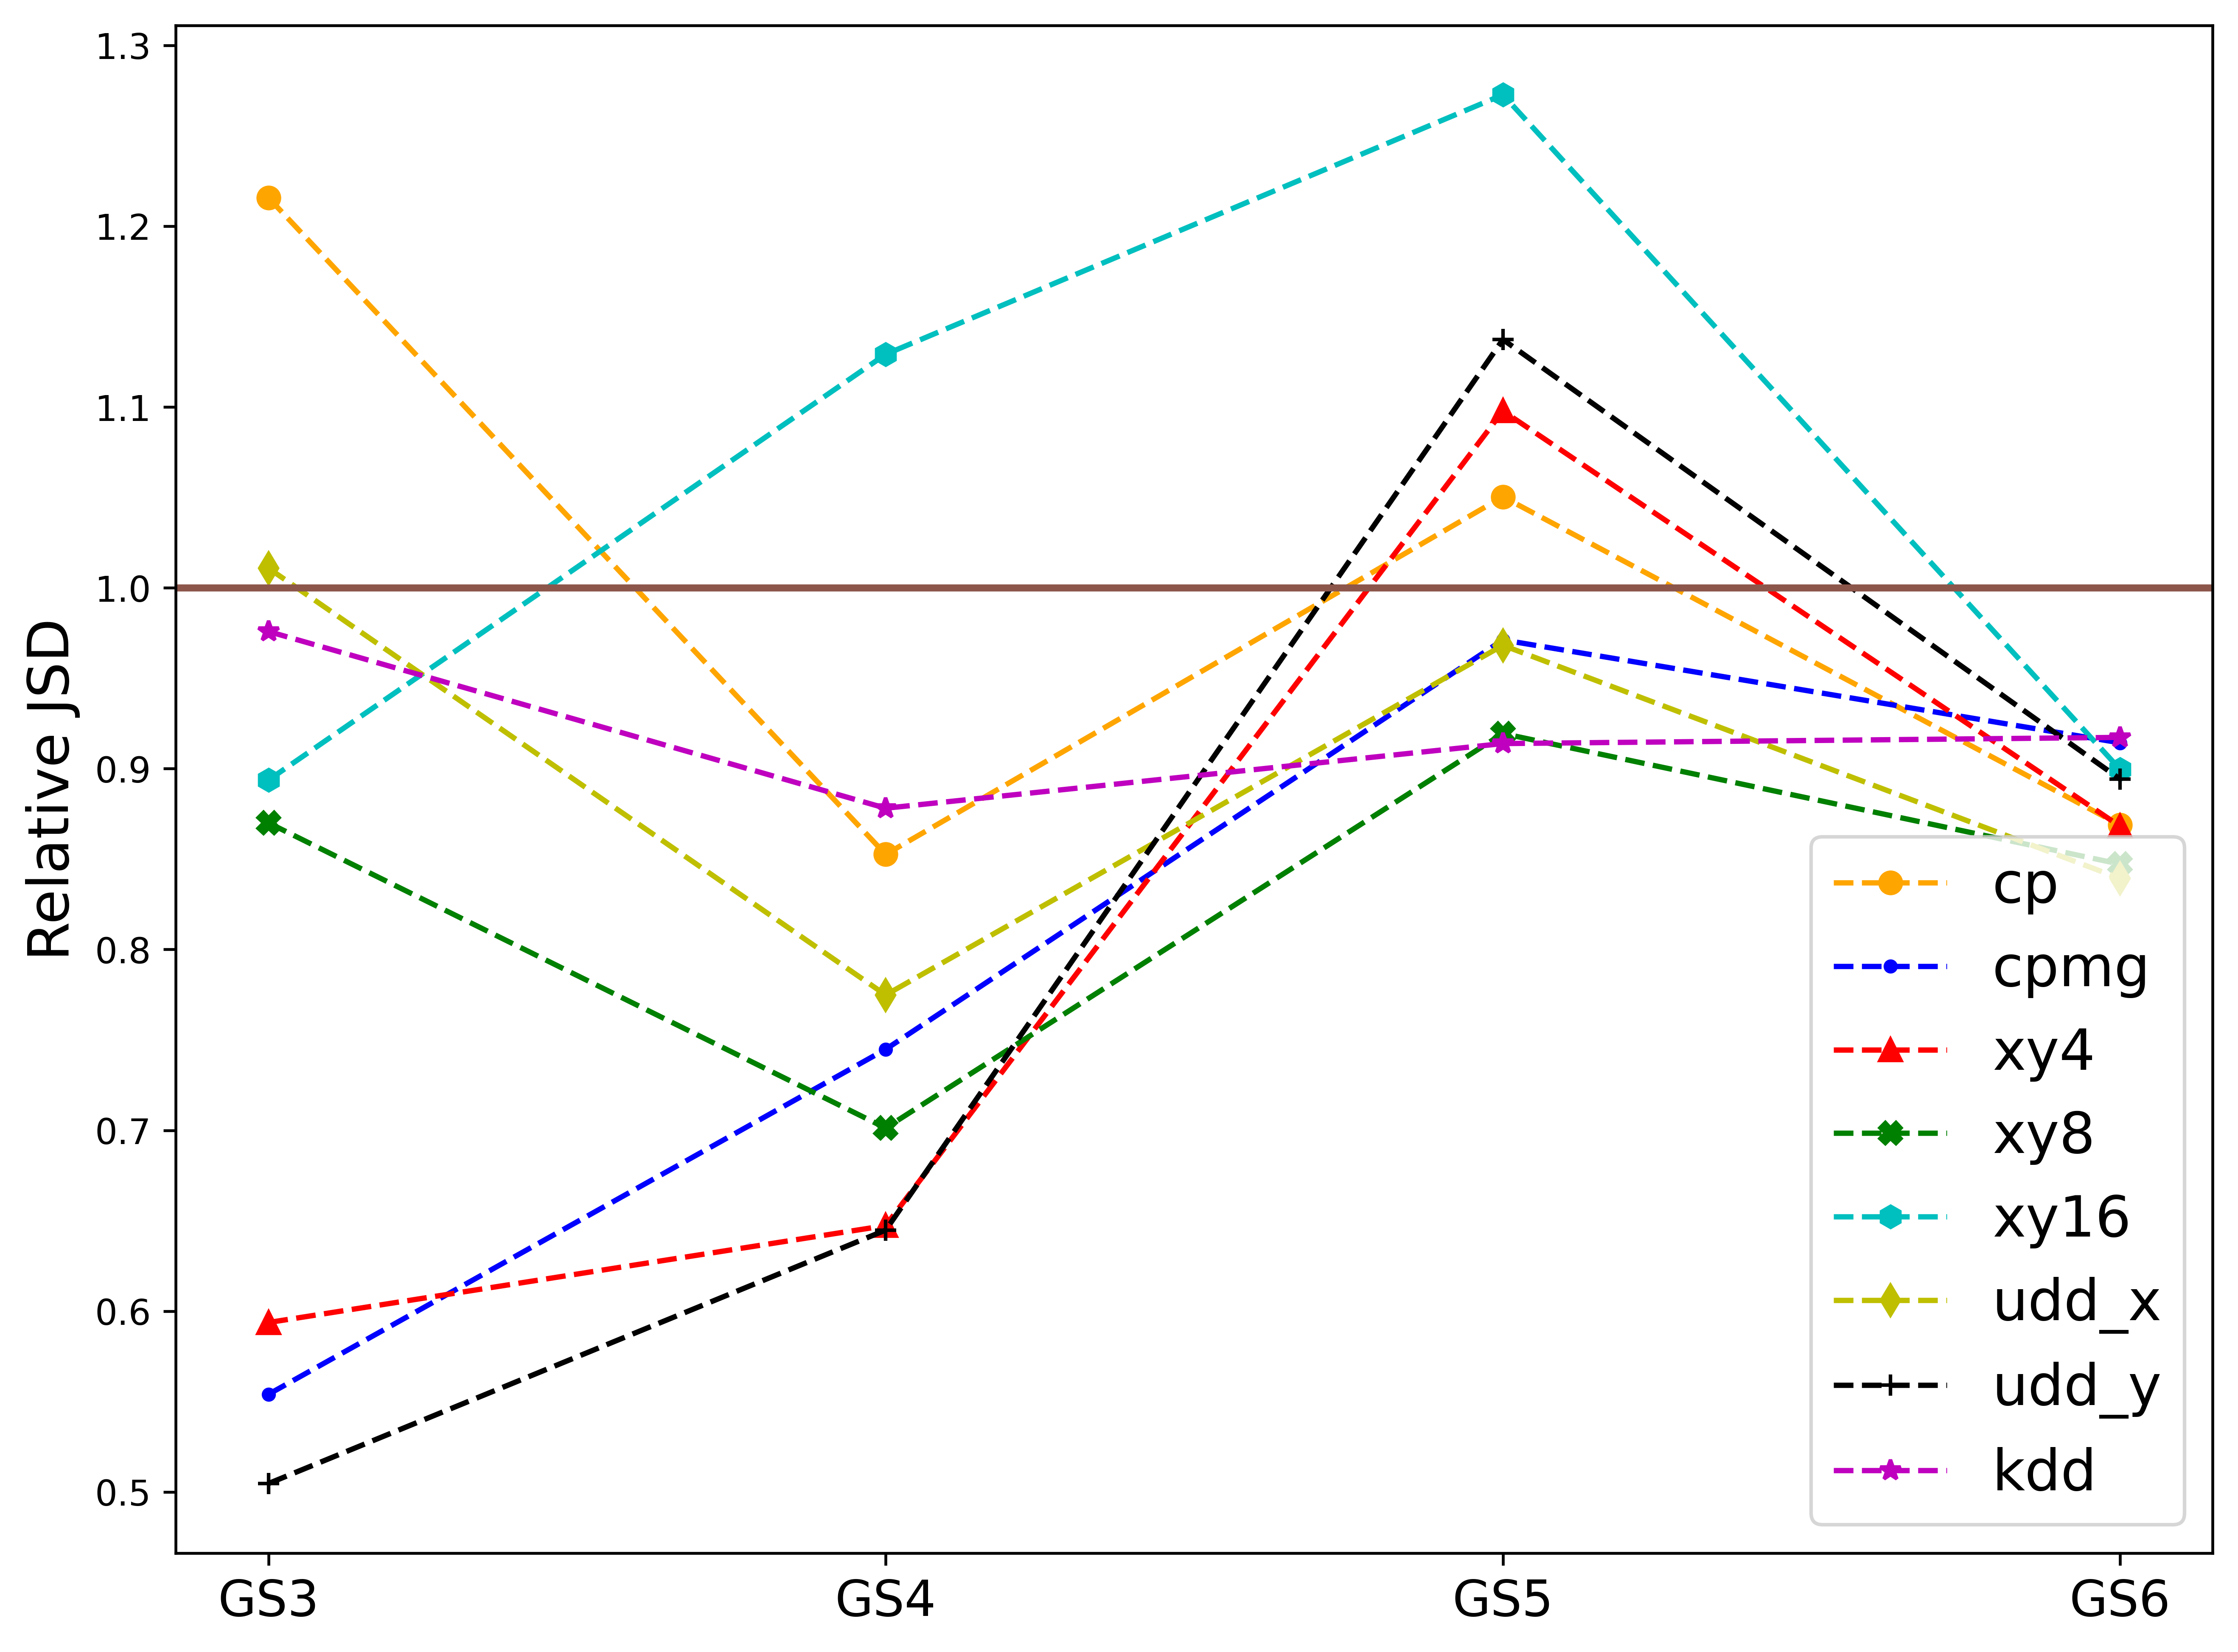

In [13]:
baseline = []

data = []
for name in circuit_names:
    result_data = gs_results_data[name]
    baseline.append(result_data[0])
    ratio = [result_data[0]/i for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)
#
# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[:, 2]
cpmg = data[:, 3]
xy4 = data[:, 4]
xy8 = data[:, 5]
xy16 = data[:, 6]
udd_X = data[:, 7]
udd_Y = data[:, 8]
kdd = data[:, 9]

x_ticks = circuit_names
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp, linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg, linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4, linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8, linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16, linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X, linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y, linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd, linestyle='--', marker='*', color='m', label='kdd')
plt.axhline(1, color='tab:brown', lw=2)

plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative JSD result for GS circuit on ibmq_jakarta', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative JSD', fontsize=16)

plt.savefig('TQE_Relat_JSD_GS_jakarta_0530.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
qft_job_ids = []
qft_jobs = []

for circuit in qft_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    qft_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    qft_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d658f33cdb01d82e06a0
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d65a9baeab34e64acd75
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d65c0212ffa0cd251f1a
if applied DD for None: False
if applied DD for N

In [13]:
for job_id in qft_job_ids:
    print(job_id)

6295d658f33cdb01d82e06a0
6295d65a9baeab34e64acd75
6295d65c0212ffa0cd251f1a
6295d66016cdc41a90f25e45


In [15]:
from scipy.spatial.distance import jensenshannon
qft_jsds = []

qft_job_ids = [
    '',
    '',
    '',
    '',
]

shots = 8192

for i, circuit in enumerate(qft_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    result_counts = backend.retrieve_job(qft_job_ids[i]).result().get_counts()
    jsd = []
    for result_count in result_counts:
        p_ideal, p_result = convert_count_to_prob(result_count, ideal_counts, shots=shots)
        jsd.append(jensenshannon(p_ideal, p_result))
    qft_jsds.append(jsd)

circuit_names = ['QFT3', 'QFT4', 'QFT5', 'QFT6', ]
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']

qft_results_data = {}

for i, name in enumerate(circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, jsd in enumerate(qft_jsds[i]):
        print(f'jsd result of {DD_sequences[j]}: {jsd}')
    qft_results_data[name] = qft_jsds[i]

---------Result of circuit QFT3 -------------
jsd result of no_dd: 0.05117121689507579
jsd result of hahn_X: 0.04895013567909518
jsd result of hahn_Y: 0.04409043611126303
jsd result of CP: 0.06584571326120323
jsd result of CPMG: 0.0728717502260234
jsd result of xy4: 0.06364966000823585
jsd result of xy8: 0.06836413069145889
jsd result of xy16: 0.06490750388590312
jsd result of udd1: 0.054469714576565346
jsd result of udd2: 0.10899199773119089
jsd result of kdd: 0.06356037362948316
---------Result of circuit QFT4 -------------
jsd result of no_dd: 0.11104103028466912
jsd result of hahn_X: 0.11197620547734148
jsd result of hahn_Y: 0.11346731550051249
jsd result of CP: 0.12204387019948253
jsd result of CPMG: 0.11502008015506933
jsd result of xy4: 0.09966845312069722
jsd result of xy8: 0.10366983605808065
jsd result of xy16: 0.11205388350865493
jsd result of udd1: 0.11420353319913228
jsd result of udd2: 0.1234234303437928
jsd result of kdd: 0.12305886737973427
---------Result of circuit QF

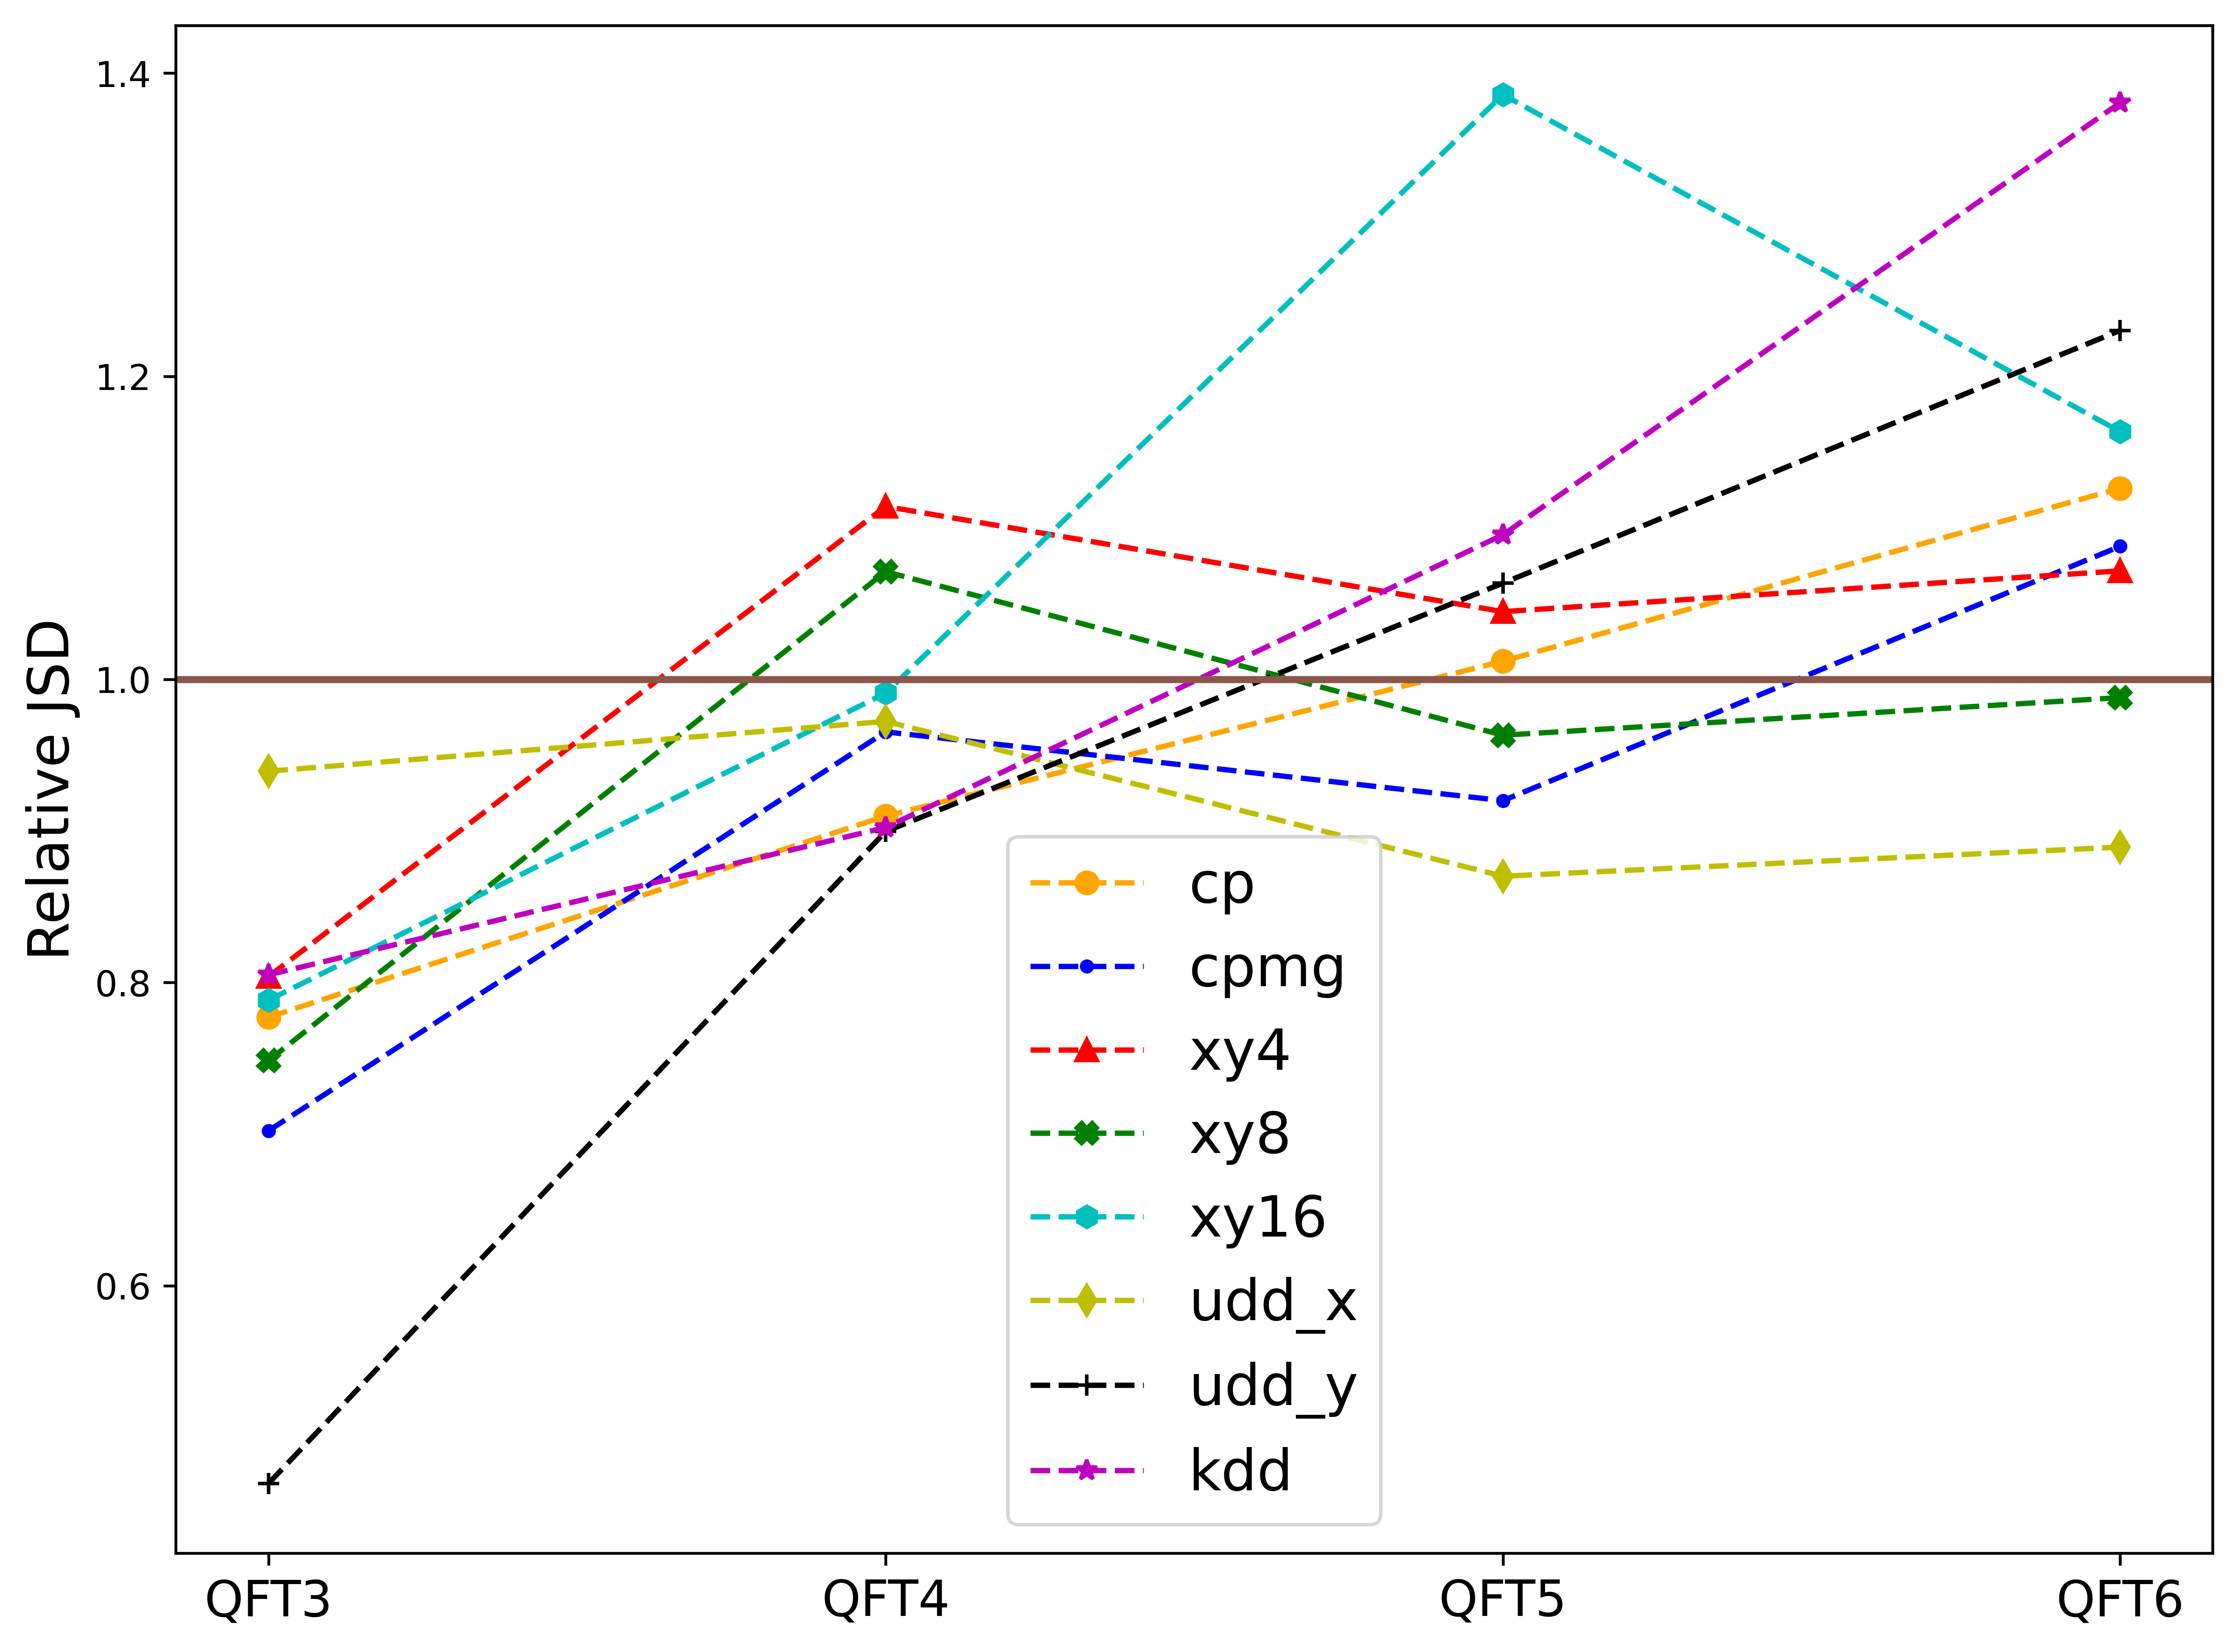

In [16]:
import numpy as np
import matplotlib.pyplot as plt


baseline = []
circuit_names = ['QFT3', 'QFT4', 'QFT5', 'QFT6']
data = []
for name in circuit_names:
    result_data = qft_results_data[name]
    baseline.append(result_data[0])
    ratio = [result_data[0]/i for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)
#
# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[:, 2]
cpmg = data[:, 3]
xy4 = data[:, 4]
xy8 = data[:, 5]
xy16 = data[:, 6]
udd_X = data[:, 7]
udd_Y = data[:, 8]
kdd = data[:, 9]

x_ticks = circuit_names
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp, linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg, linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4, linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8, linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16, linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X, linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y, linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd, linestyle='--', marker='*', color='m', label='kdd')
plt.axhline(1, color='tab:brown', lw=2)

plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative JSD result for QFT circuit on ibmq_jakarta', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative JSD', fontsize=16)

plt.savefig('TQE_Relat_JSD_QFT_jakarta_0530.pdf', bbox_inches='tight', pad_inches=0)